In [18]:
import pandas as pd

# Load the Excel file
file_path = "proj4data.xlsx"

# Load all sheets into a dictionary of dataframes
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
dfs = {sheet: xls.parse(sheet) for sheet in sheet_names}

# Display sheet names
sheet_names

['employed_ft',
 'political_party',
 'employed_pt',
 'employed_persons',
 'unemployed_ft_work',
 'unemployed_pt_work',
 'unemployed_persons',
 'labour_force',
 'not_in_labour_force',
 'civ_popln',
 'participation_rate_pct',
 'unemployment_rate_pct',
 'unemployment_rate_lftw_pct',
 'unemployment_rate_lptw_pct',
 'employment_popln_ratio_pct']

In [19]:
# Display summary information for each sheet
summary_info = {}

for sheet, df in dfs.items():
    summary_info[sheet] = {
        "Columns": list(df.columns),
        "Missing Values": df.isnull().sum().to_dict(),
        "Data Types": df.dtypes.to_dict(),
        "First 5 Rows": df.head().to_dict(orient="records"),
    }

summary_info

{'employed_ft': {'Columns': ['Time Period', 'Males', 'Females'],
  'Missing Values': {'Time Period': 0, 'Males': 0, 'Females': 0},
  'Data Types': {'Time Period': dtype('O'),
   'Males': dtype('float64'),
   'Females': dtype('float64')},
  'First 5 Rows': [{'Time Period': 'Jan 2015',
    'Males': 1612.13230591,
    'Females': 903.36492959},
   {'Time Period': 'Feb 2015',
    'Males': 1656.43257004,
    'Females': 928.62275552},
   {'Time Period': 'Mar 2015', 'Males': 1653.937301, 'Females': 918.66365588},
   {'Time Period': 'Apr 2015',
    'Males': 1632.14196352,
    'Females': 928.36942661},
   {'Time Period': 'May 2015',
    'Males': 1637.25307695,
    'Females': 943.63167454}]},
 'political_party': {'Columns': ['Time Period', 'Political party'],
  'Missing Values': {'Time Period': 0, 'Political party': 0},
  'Data Types': {'Time Period': dtype('O'), 'Political party': dtype('O')},
  'First 5 Rows': [{'Time Period': 'Jan 2015',
    'Political party': 'LNC - Mike Baird'},
   {'Time Pe

In [20]:
# Convert 'Time Period' column to datetime format (MM-YYYY)
for sheet, df in dfs.items():
    if "Time Period" in df.columns:
        df["Time Period"] = pd.to_datetime(df["Time Period"], format="%b %Y").dt.strftime("%m-%Y")

# Verify the conversion by displaying the first few rows of one sheet
dfs["employed_ft"].head()

,Time Period,Males,Females
0,01-2015,1612.132306,903.364930
1,02-2015,1656.432570,928.622756
2,03-2015,1653.937301,918.663656
3,04-2015,1632.141964,928.369427
4,05-2015,1637.253077,943.631675


In [21]:
# Standardize column names: lowercase and replace spaces with underscores
for sheet, df in dfs.items():
    df.columns = df.columns.str.lower().str.replace(" ", "_")

# Verify the changes by displaying the first few rows of one sheet
dfs["employed_ft"].head()

,time_period,males,females
0,01-2015,1612.132306,903.364930
1,02-2015,1656.432570,928.622756
2,03-2015,1653.937301,918.663656
3,04-2015,1632.141964,928.369427
4,05-2015,1637.253077,943.631675


In [22]:
# List of sheets to modify
sheets_to_modify = [
    "employed_ft",
    "employed_pt",
    "employed_persons",
    "unemployed_ft_work",
    "unemployed_pt_work",
    "unemployed_persons",
    "labour_force",
    "not_in_labour_force",
    "civ_popln"
]

# Multiply 'males' and 'females' columns by 1000
for sheet in sheets_to_modify:
    if sheet in dfs:
        dfs[sheet][["males", "females"]] *= 1000

# Verify changes by displaying the first few rows of one sheet
dfs["employed_ft"].head()

,time_period,males,females
0,01-2015,1.612132e+06,903364.92959
1,02-2015,1.656433e+06,928622.75552
2,03-2015,1.653937e+06,918663.65588
3,04-2015,1.632142e+06,928369.42661
4,05-2015,1.637253e+06,943631.67454


In [23]:
# Check for duplicate rows in each sheet
duplicate_counts = {sheet: df.duplicated().sum() for sheet, df in dfs.items()}

# Display sheets with duplicate counts
duplicate_counts

{'employed_ft': 0,
 'political_party': 0,
 'employed_pt': 0,
 'employed_persons': 0,
 'unemployed_ft_work': 0,
 'unemployed_pt_work': 0,
 'unemployed_persons': 0,
 'labour_force': 0,
 'not_in_labour_force': 0,
 'civ_popln': 0,
 'participation_rate_pct': 0,
 'unemployment_rate_pct': 0,
 'unemployment_rate_lftw_pct': 0,
 'unemployment_rate_lptw_pct': 0,
 'employment_popln_ratio_pct': 0}

In [24]:
# Create Males Table
males_table = dfs["employed_ft"][["time_period", "males"]].rename(columns={"males": "employed_ft"})

# Merge other datasets for males
for sheet in sheets_to_modify[1:]:  # Excluding employed_ft as it's already selected
    males_table = males_table.merge(
        dfs[sheet][["time_period", "males"]].rename(columns={"males": sheet}),
        on="time_period",
        how="inner"
    )

# Create Females Table
females_table = dfs["employed_ft"][["time_period", "females"]].rename(columns={"females": "employed_ft"})

# Merge other datasets for females
for sheet in sheets_to_modify[1:]:  # Excluding employed_ft as it's already selected
    females_table = females_table.merge(
        dfs[sheet][["time_period", "females"]].rename(columns={"females": sheet}),
        on="time_period",
        how="inner"
    )

# Display the first few rows of the tables
print(males_table.head())
print(females_table.head())



  time_period   employed_ft   employed_pt  employed_persons  \
0     01-2015  1.612132e+06  327438.99076      1.939571e+06   
1     02-2015  1.656433e+06  326170.17055      1.982603e+06   
2     03-2015  1.653937e+06  339493.50772      1.993431e+06   
3     04-2015  1.632142e+06  374914.43265      2.007056e+06   
4     05-2015  1.637253e+06  361583.26241      1.998836e+06   

   unemployed_ft_work  unemployed_pt_work  unemployed_persons  labour_force  \
0        112228.08182         33422.15437        145650.23619  2.085222e+06   
1        108120.34214         25154.18798        133274.53011  2.115877e+06   
2         96360.93679         29915.56651        126276.50330  2.119707e+06   
3         88159.63441         25044.54928        113204.18369  2.120261e+06   
4         84834.25047         26851.61757        111685.86804  2.110522e+06   

   not_in_labour_force     civ_popln  
0         921844.46714  3.007066e+06  
1         895906.72930  3.011784e+06  
2         896787.68798  3.016

In [25]:
# Merge political party data into males table
males_table = males_table.merge(
    dfs["political_party"][["time_period", "political_party"]],
    on="time_period",
    how="left"
)

# Merge political party data into females table
females_table = females_table.merge(
    dfs["political_party"][["time_period", "political_party"]],
    on="time_period",
    how="left"
)

# Display the first few rows
print(males_table.head())
print(females_table.head())

  time_period   employed_ft   employed_pt  employed_persons  \
0     01-2015  1.612132e+06  327438.99076      1.939571e+06   
1     02-2015  1.656433e+06  326170.17055      1.982603e+06   
2     03-2015  1.653937e+06  339493.50772      1.993431e+06   
3     04-2015  1.632142e+06  374914.43265      2.007056e+06   
4     05-2015  1.637253e+06  361583.26241      1.998836e+06   

   unemployed_ft_work  unemployed_pt_work  unemployed_persons  labour_force  \
0        112228.08182         33422.15437        145650.23619  2.085222e+06   
1        108120.34214         25154.18798        133274.53011  2.115877e+06   
2         96360.93679         29915.56651        126276.50330  2.119707e+06   
3         88159.63441         25044.54928        113204.18369  2.120261e+06   
4         84834.25047         26851.61757        111685.86804  2.110522e+06   

   not_in_labour_force     civ_popln   political_party  
0         921844.46714  3.007066e+06  LNC - Mike Baird  
1         895906.72930  3.011784

In [26]:
# Save the tables as CSV files locally
males_table.to_csv("males_table.csv", index=False)
females_table.to_csv("females_table.csv", index=False)

print("Files saved successfully!")

Files saved successfully!


In [27]:
# Convert 'time_period' to datetime format
males_table["time_period"] = pd.to_datetime(males_table["time_period"], format="%m-%Y")

# Create a numerical representation of time (months since the first record)
males_table["time_numeric"] = (males_table["time_period"] - males_table["time_period"].min()).dt.days // 30

# Verify the transformation
males_table[["time_period", "time_numeric"]].head()


,time_period,time_numeric
0,2015-01-01,0
1,2015-02-01,1
2,2015-03-01,1
3,2015-04-01,3
4,2015-05-01,4


In [28]:
# Check for gaps in the time series data
time_gaps = males_table["time_numeric"].diff().value_counts()

# Display the distribution of time differences to check for missing months
time_gaps

time_numeric
1.0    116
2.0      2
0.0      1
Name: count, dtype: int64

In [29]:
# Identify rows where the difference in time_numeric is greater than 1 (indicating gaps)
gaps = males_table[males_table["time_numeric"].diff() > 1]

gaps

,time_period,employed_ft,employed_pt,employed_persons,unemployed_ft_work,unemployed_pt_work,unemployed_persons,labour_force,not_in_labour_force,civ_popln,political_party,time_numeric
3,2015-04-01,1.632142e+06,374914.43265,2.007056e+06,88159.63441,25044.54928,113204.18369,2.120261e+06,898914.42013,3.019175e+06,LNC - Mike Baird,3
68,2020-09-01,1.682731e+06,411437.52156,2.094169e+06,143513.04097,26090.33894,169603.37992,2.263772e+06,978257.99866,3.242030e+06,LNC - Gladys Berejiklian,69


In [30]:
# Ensure time_period is in datetime format
males_table["time_period"] = pd.to_datetime(males_table["time_period"])

# Generate a complete sequence of months from the first to the last date
full_time_range = pd.date_range(start=males_table["time_period"].min(), 
                                end=males_table["time_period"].max(), 
                                freq='MS')

# Create a new DataFrame with the full time range
full_time_df = pd.DataFrame({"time_period": full_time_range})

# Drop duplicates (if any exist) before merging
males_table = males_table.drop_duplicates(subset=["time_period"])

# Merge the full time range with the existing dataset
males_table = full_time_df.merge(males_table, on="time_period", how="left")

# Recompute time_numeric with an enforced perfect sequence
males_table["time_numeric"] = range(len(males_table))

# Identify numerical columns for interpolation (excluding time-related columns)
numeric_cols = males_table.select_dtypes(include=["float64", "int64"]).columns

# Interpolate missing values
males_table[numeric_cols] = males_table[numeric_cols].interpolate(method="linear")

# Final check: Ensure no missing months
print(males_table["time_numeric"].diff().value_counts())


time_numeric
1.0    119
Name: count, dtype: int64


In [31]:
# Split 'political_party' into 'party' and 'leader'
males_table[["party", "leader"]] = males_table["political_party"].str.split(" - ", expand=True)

males_table.drop(columns=["political_party"], inplace=True)

males_table.head()

,time_period,employed_ft,employed_pt,employed_persons,unemployed_ft_work,unemployed_pt_work,unemployed_persons,labour_force,not_in_labour_force,civ_popln,time_numeric,party,leader
0,2015-01-01,1.612132e+06,327438.99076,1.939571e+06,112228.08182,33422.15437,145650.23619,2.085222e+06,921844.46714,3.007066e+06,0,LNC,Mike Baird
1,2015-02-01,1.656433e+06,326170.17055,1.982603e+06,108120.34214,25154.18798,133274.53011,2.115877e+06,895906.72930,3.011784e+06,1,LNC,Mike Baird
2,2015-03-01,1.653937e+06,339493.50772,1.993431e+06,96360.93679,29915.56651,126276.50330,2.119707e+06,896787.68798,3.016495e+06,2,LNC,Mike Baird
3,2015-04-01,1.632142e+06,374914.43265,2.007056e+06,88159.63441,25044.54928,113204.18369,2.120261e+06,898914.42013,3.019175e+06,3,LNC,Mike Baird
4,2015-05-01,1.637253e+06,361583.26241,1.998836e+06,84834.25047,26851.61757,111685.86804,2.110522e+06,911337.79260,3.021860e+06,4,LNC,Mike Baird


In [43]:
# Define the columns to create lag features
lag_features = ["employed_ft", "employed_pt", "unemployed_ft_work", "unemployed_pt_work"]

# Create lagged columns for 1-month, 3-month, and 12-month intervals
for lag in [1, 3, 12]:
    for feature in lag_features:
        males_table[f"{feature}_lag_{lag}"] = males_table[feature].shift(lag)

# Drop any rows with NaNs due to lagging (optional)
males_table.dropna(inplace=True)

males_table.head()

,time_period,employed_ft,employed_pt,employed_persons,unemployed_ft_work,unemployed_pt_work,unemployed_persons,labour_force,not_in_labour_force,civ_popln,...,unemployed_ft_work_lag_1,unemployed_pt_work_lag_1,employed_ft_lag_3,employed_pt_lag_3,unemployed_ft_work_lag_3,unemployed_pt_work_lag_3,employed_ft_lag_12,employed_pt_lag_12,unemployed_ft_work_lag_12,unemployed_pt_work_lag_12
24,2017-01-01,1.641404e+06,355596.21005,1.997000e+06,85811.19318,27645.32262,113456.51580,2.110457e+06,993113.35058,3.103570e+06,...,74666.92577,31608.54891,1.648506e+06,389200.71040,71410.72794,22526.86126,1.652160e+06,351923.54046,93703.47346,29095.42625
25,2017-02-01,1.678148e+06,357980.81405,2.036128e+06,85622.24152,34539.88095,120162.12246,2.156290e+06,953052.53832,3.109343e+06,...,85811.19318,27645.32262,1.650965e+06,387952.66813,71594.13557,24624.80875,1.681418e+06,344135.16708,89800.19432,22801.22476
26,2017-03-01,1.664434e+06,375245.10757,2.039679e+06,79340.60726,32734.35348,112074.96074,2.151754e+06,963359.78391,3.115114e+06,...,85622.24152,34539.88095,1.667808e+06,378407.85477,74666.92577,31608.54891,1.650018e+06,377302.43752,83854.18978,27064.17053
27,2017-04-01,1.659262e+06,399353.49706,2.058616e+06,69541.88434,22925.17363,92467.05797,2.151083e+06,967711.40907,3.118794e+06,...,79340.60726,32734.35348,1.641404e+06,355596.21005,85811.19318,27645.32262,1.649670e+06,381943.31060,87446.32249,18118.28868
28,2017-05-01,1.671586e+06,380133.71066,2.051720e+06,73493.28572,26732.59195,100225.87767,2.151946e+06,970525.98802,3.122472e+06,...,69541.88434,22925.17363,1.678148e+06,357980.81405,85622.24152,34539.88095,1.656596e+06,391425.74164,85171.12585,24713.33721


In [49]:
print(males_table.isna().sum())

time_period                  0
employed_ft                  0
employed_pt                  0
employed_persons             0
unemployed_ft_work           0
unemployed_pt_work           0
unemployed_persons           0
labour_force                 0
not_in_labour_force          0
civ_popln                    0
time_numeric                 0
party                        0
leader                       0
employed_ft_lag_1            0
employed_pt_lag_1            0
unemployed_ft_work_lag_1     0
unemployed_pt_work_lag_1     0
employed_ft_lag_3            0
employed_pt_lag_3            0
unemployed_ft_work_lag_3     0
unemployed_pt_work_lag_3     0
employed_ft_lag_12           0
employed_pt_lag_12           0
unemployed_ft_work_lag_12    0
unemployed_pt_work_lag_12    0
dtype: int64


In [55]:
if "political_party" in males_table.columns:
    males_table[["party", "leader"]] = males_table["political_party"].str.split(" - ", expand=True)
    males_table.drop(columns=["political_party"], inplace=True)

X = males_table.drop(columns=target_vars + ["time_period"])
X = pd.get_dummies(X, columns=["party", "leader"], drop_first=True)

In [58]:
print(X.columns)

Index(['employed_persons', 'unemployed_persons', 'labour_force',
       'not_in_labour_force', 'civ_popln', 'time_numeric', 'employed_ft_lag_1',
       'employed_pt_lag_1', 'unemployed_ft_work_lag_1',
       'unemployed_pt_work_lag_1', 'employed_ft_lag_3', 'employed_pt_lag_3',
       'unemployed_ft_work_lag_3', 'unemployed_pt_work_lag_3',
       'employed_ft_lag_12', 'employed_pt_lag_12', 'unemployed_ft_work_lag_12',
       'unemployed_pt_work_lag_12', 'party_Labor', 'leader_Dominic Perrottet',
       'leader_Gladys Berejiklian', 'leader_Mike Baird'],
      dtype='object')


In [61]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target variables (Y)
target_vars = ["employed_ft", "employed_pt", "unemployed_ft_work", "unemployed_pt_work"]

# Define train-test split masks
train_mask = (males_table["time_period"] >= "2015-01-01") & (males_table["time_period"] <= "2023-12-01")
test_mask = (males_table["time_period"] >= "2024-01-01") & (males_table["time_period"] <= "2024-12-01")

# Apply masks BEFORE encoding to maintain alignment
train_data = males_table.loc[train_mask].copy()
test_data = males_table.loc[test_mask].copy()

# Drop unnecessary columns
X_train = train_data.drop(columns=target_vars + ["time_period"])
X_test = test_data.drop(columns=target_vars + ["time_period"])
Y_train = train_data[target_vars]
Y_test = test_data[target_vars]

# One-hot encoding AFTER applying masks
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize models
xgb_models = {}
rf_models = {}
Y_pred_xgb = {}
Y_pred_rf = {}

# Train XGBoost and Random Forest for each target variable
for target in target_vars:
    xgb_models[target] = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    rf_models[target] = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train models
    xgb_models[target].fit(X_train, Y_train[target])
    rf_models[target].fit(X_train, Y_train[target])

    # Make predictions
    Y_pred_xgb[target] = xgb_models[target].predict(X_test)
    Y_pred_rf[target] = rf_models[target].predict(X_test)



In [62]:
# Function to print evaluation metrics
def evaluate_model(model_name, Y_true, Y_pred):
    for target in target_vars:
        print(f"\n--- {target} ({model_name}) ---")
        print("MAE:", mean_absolute_error(Y_true[target], Y_pred[target]))
        print("RMSE:", mean_squared_error(Y_true[target], Y_pred[target], squared=False))
        print("R² Score:", r2_score(Y_true[target], Y_pred[target]))

# Evaluate both models
evaluate_model("XGBoost", Y_test, Y_pred_xgb)
evaluate_model("Random Forest", Y_test, Y_pred_rf)



--- employed_ft (XGBoost) ---
MAE: 15806.619273333383
RMSE: 18606.898275305277
R² Score: 0.2965434717630898

--- employed_pt (XGBoost) ---
MAE: 20339.329202499997
RMSE: 23564.019073704058
R² Score: -0.7570888469143009

--- unemployed_ft_work (XGBoost) ---
MAE: 2945.6217204166655
RMSE: 4385.447103840312
R² Score: 0.60169323602303

--- unemployed_pt_work (XGBoost) ---
MAE: 3285.345219635417
RMSE: 4038.861075594842
R² Score: -1.549884688783687

--- employed_ft (Random Forest) ---
MAE: 19716.550303808686
RMSE: 22988.883110357525
R² Score: -0.07380406031984776

--- employed_pt (Random Forest) ---
MAE: 21586.76975532528
RMSE: 25880.198823516366
R² Score: -1.1194843190366504

--- unemployed_ft_work (Random Forest) ---
MAE: 3089.5691589833273
RMSE: 4235.201949554838
R² Score: 0.628517657659078

--- unemployed_pt_work (Random Forest) ---
MAE: 4808.483793441678
RMSE: 5541.506479629514
R² Score: -3.8001897127298534


C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

In [64]:
# Add Moving Averages for 3-month, 6-month, and 12-month windows
for window in [3, 6, 12]:  # 3-month, 6-month, and yearly moving average
    for col in ["employed_ft", "employed_pt", "unemployed_ft_work", "unemployed_pt_work"]:
        males_table[f"{col}_ma_{window}"] = males_table[col].rolling(window=window, min_periods=1).mean()

# Re-run XGBoost and Random Forest with Moving Averages

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target variables (Y)
target_vars = ["employed_ft", "employed_pt", "unemployed_ft_work", "unemployed_pt_work"]

# Define train-test split masks
train_mask = (males_table["time_period"] >= "2015-01-01") & (males_table["time_period"] <= "2023-12-01")
test_mask = (males_table["time_period"] >= "2024-01-01") & (males_table["time_period"] <= "2024-12-01")

# Apply masks BEFORE encoding to maintain alignment
train_data = males_table.loc[train_mask].copy()
test_data = males_table.loc[test_mask].copy()

# Drop unnecessary columns
X_train = train_data.drop(columns=target_vars + ["time_period"])
X_test = test_data.drop(columns=target_vars + ["time_period"])
Y_train = train_data[target_vars]
Y_test = test_data[target_vars]

# One-hot encoding AFTER applying masks
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize models
xgb_models = {}
rf_models = {}
Y_pred_xgb = {}
Y_pred_rf = {}

# Train XGBoost and Random Forest for each target variable
for target in target_vars:
    xgb_models[target] = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    rf_models[target] = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train models
    xgb_models[target].fit(X_train, Y_train[target])
    rf_models[target].fit(X_train, Y_train[target])

    # Make predictions
    Y_pred_xgb[target] = xgb_models[target].predict(X_test)
    Y_pred_rf[target] = rf_models[target].predict(X_test)

# Evaluate both models
def evaluate_model(model_name, Y_true, Y_pred):
    for target in target_vars:
        print(f"\n--- {target} ({model_name}) ---")
        print("MAE:", mean_absolute_error(Y_true[target], Y_pred[target]))
        print("RMSE:", mean_squared_error(Y_true[target], Y_pred[target], squared=False))
        print("R² Score:", r2_score(Y_true[target], Y_pred[target]))

# Print results
evaluate_model("XGBoost with Moving Averages", Y_test, Y_pred_xgb)
evaluate_model("Random Forest with Moving Averages", Y_test, Y_pred_rf)



--- employed_ft (XGBoost with Moving Averages) ---
MAE: 18175.53144666669
RMSE: 23141.986813443316
R² Score: -0.08815454724041771

--- employed_pt (XGBoost with Moving Averages) ---
MAE: 19815.245869166665
RMSE: 22672.386027852437
R² Score: -0.6266325018156591

--- unemployed_ft_work (XGBoost with Moving Averages) ---
MAE: 4100.743579374997
RMSE: 5310.200597445513
R² Score: 0.41600143223582986

--- unemployed_pt_work (XGBoost with Moving Averages) ---
MAE: 2542.419988854167
RMSE: 3890.927030053231
R² Score: -1.3665129396264883

--- employed_ft (Random Forest with Moving Averages) ---
MAE: 17728.058533449774
RMSE: 20477.611425131952
R² Score: 0.14798372001364346

--- employed_pt (Random Forest with Moving Averages) ---
MAE: 21374.458112358552
RMSE: 24497.518234186697
R² Score: -0.8990621154083878

--- unemployed_ft_work (Random Forest with Moving Averages) ---
MAE: 3432.219880574991
RMSE: 4648.407733583976
R² Score: 0.5524945202727141

--- unemployed_pt_work (Random Forest with Moving 

C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t


--- employed_ft (XGBoost (Tuned)) ---
MAE: 16116.585696666734
RMSE: 19830.348981202438
R² Score: 0.2009940526836581

--- employed_pt (XGBoost (Tuned)) ---
MAE: 21051.594827499997
RMSE: 24401.98527232188
R² Score: -0.8842794521799031

--- unemployed_ft_work (XGBoost (Tuned)) ---
MAE: 3758.094762499997
RMSE: 4575.95235991775
R² Score: 0.5663364543428138

--- unemployed_pt_work (XGBoost (Tuned)) ---
MAE: 2798.378340104167
RMSE: 3596.6463115272286
R² Score: -1.022079262440014

--- employed_ft (Random Forest (Tuned)) ---
MAE: 17439.94801527991
RMSE: 20560.80130758897
R² Score: 0.14104706072912754

--- employed_pt (Random Forest (Tuned)) ---
MAE: 21953.990155475196
RMSE: 25353.70182823069
R² Score: -1.034125517331797

--- unemployed_ft_work (Random Forest (Tuned)) ---
MAE: 3308.287350759351
RMSE: 4424.754553056519
R² Score: 0.594521064971667

--- unemployed_pt_work (Random Forest (Tuned)) ---
MAE: 2691.277992313901
RMSE: 3402.307363942512
R² Score: -0.8094633930270967


C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t

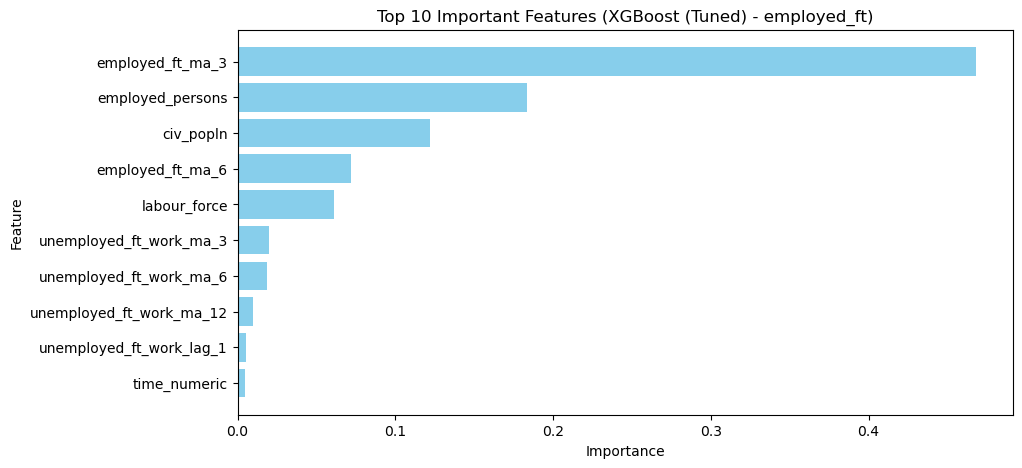

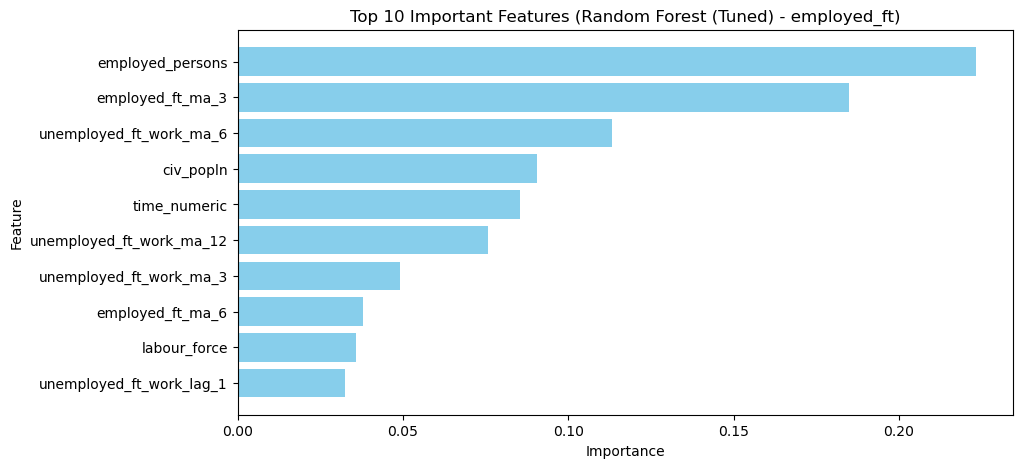

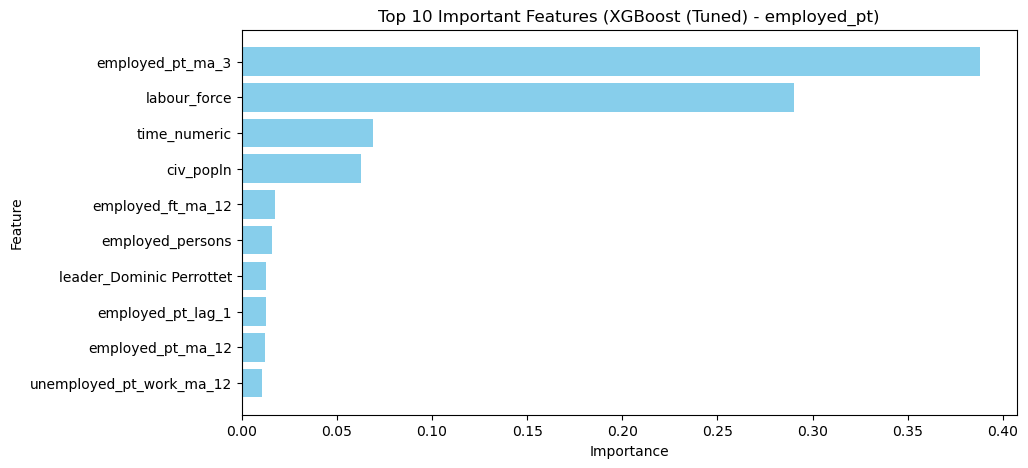

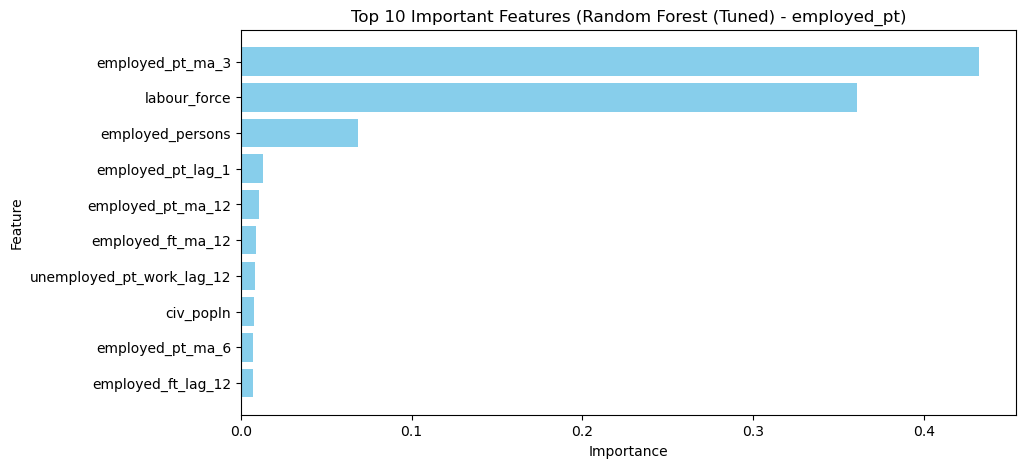

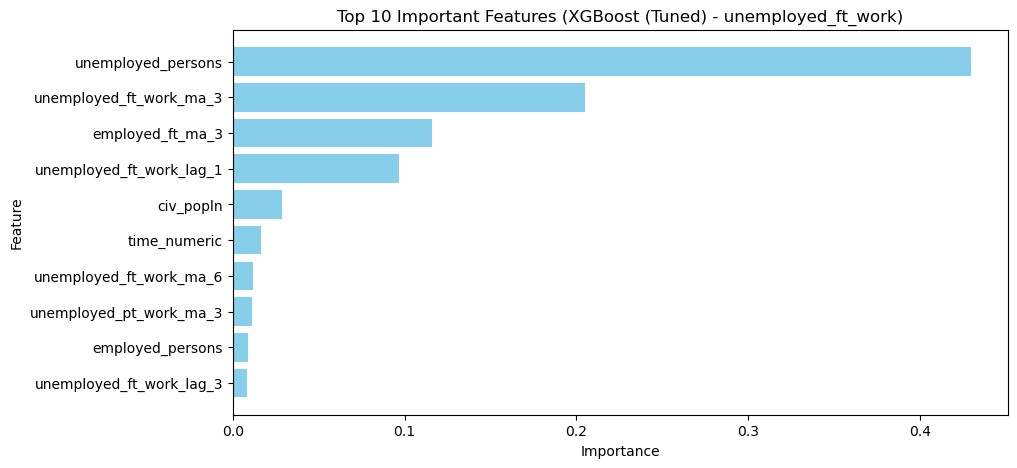

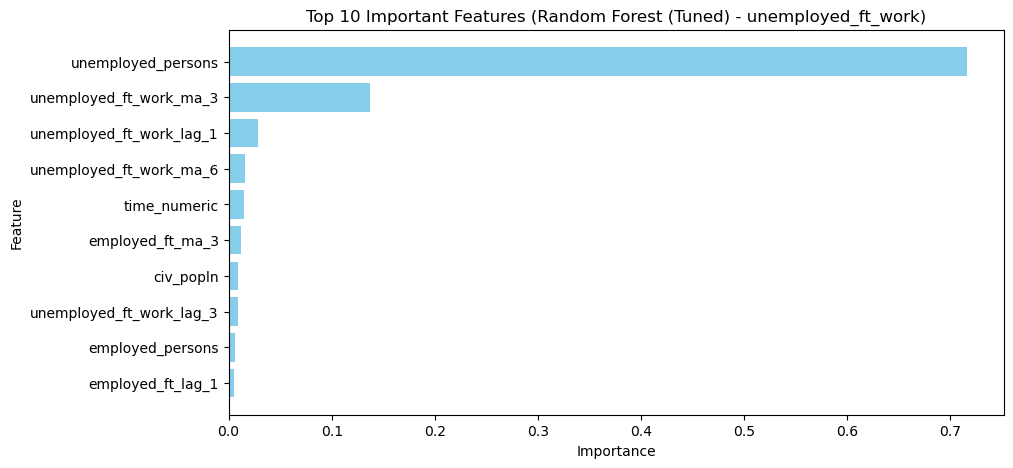

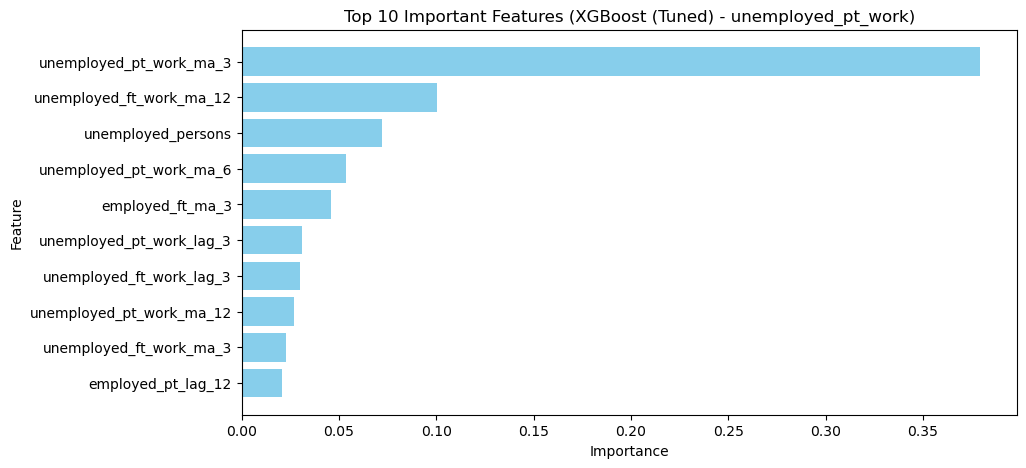

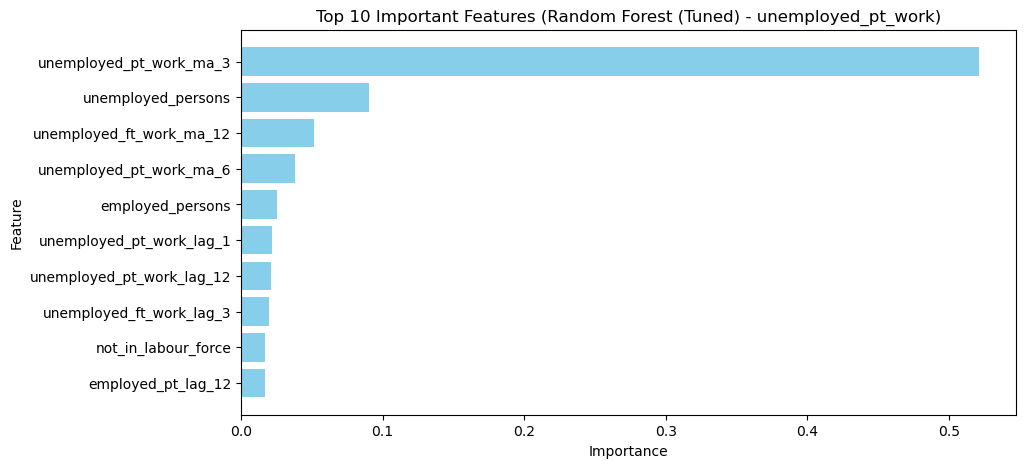

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target variables (Y)
target_vars = ["employed_ft", "employed_pt", "unemployed_ft_work", "unemployed_pt_work"]

# Define train-test split masks
train_mask = (males_table["time_period"] >= "2015-01-01") & (males_table["time_period"] <= "2023-12-01")
test_mask = (males_table["time_period"] >= "2024-01-01") & (males_table["time_period"] <= "2024-12-01")

# Apply masks BEFORE encoding to maintain alignment
train_data = males_table.loc[train_mask].copy()
test_data = males_table.loc[test_mask].copy()

# Drop unnecessary columns
X_train = train_data.drop(columns=target_vars + ["time_period"])
X_test = test_data.drop(columns=target_vars + ["time_period"])
Y_train = train_data[target_vars]
Y_test = test_data[target_vars]

# One-hot encoding AFTER applying masks
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize models with hyperparameter tuning
xgb_models = {}
rf_models = {}
Y_pred_xgb = {}
Y_pred_rf = {}

for target in target_vars:
    # Hyperparameter-tuned XGBoost
    xgb_models[target] = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=500,  # More trees for better learning
        learning_rate=0.05,  # Slower learning rate for stability
        max_depth=6,  # Deeper trees to capture interactions
        subsample=0.8,  # Avoid overfitting by using 80% of data per tree
        colsample_bytree=0.8,  # Feature selection at each tree
        random_state=42
    )

    # Hyperparameter-tuned Random Forest
    rf_models[target] = RandomForestRegressor(
        n_estimators=500,  # More trees
        max_depth=10,  # Better depth to capture long-term trends
        min_samples_split=5,  # Prevent overfitting
        random_state=42
    )

    # Train models
    xgb_models[target].fit(X_train, Y_train[target])
    rf_models[target].fit(X_train, Y_train[target])

    # Make predictions
    Y_pred_xgb[target] = xgb_models[target].predict(X_test)
    Y_pred_rf[target] = rf_models[target].predict(X_test)

# Function to evaluate model performance
def evaluate_model(model_name, Y_true, Y_pred):
    for target in target_vars:
        print(f"\n--- {target} ({model_name}) ---")
        print("MAE:", mean_absolute_error(Y_true[target], Y_pred[target]))
        print("RMSE:", mean_squared_error(Y_true[target], Y_pred[target], squared=False))
        print("R² Score:", r2_score(Y_true[target], Y_pred[target]))

# Print evaluation results
evaluate_model("XGBoost (Tuned)", Y_test, Y_pred_xgb)
evaluate_model("Random Forest (Tuned)", Y_test, Y_pred_rf)

# Plot Feature Importance for XGBoost
def plot_feature_importance(model, model_name, target):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": importance})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Top 10 Important Features ({model_name} - {target})")
    plt.gca().invert_yaxis()
    plt.show()

# Plot for each target variable
for target in target_vars:
    plot_feature_importance(xgb_models[target], "XGBoost (Tuned)", target)
    plot_feature_importance(rf_models[target], "Random Forest (Tuned)", target)


In [68]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize LightGBM models
lgb_models = {}
Y_pred_lgb = {}

for target in target_vars:
    lgb_models[target] = LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,  
        max_depth=6,
        random_state=42
    )
    
    lgb_models[target].fit(X_train, Y_train[target])
    Y_pred_lgb[target] = lgb_models[target].predict(X_test)

def evaluate_model(model_name, Y_true, Y_pred):
    for target in target_vars:
        print(f"\n--- {target} ({model_name}) ---")
        print("MAE:", mean_absolute_error(Y_true[target], Y_pred[target]))
        print("RMSE:", mean_squared_error(Y_true[target], Y_pred[target], squared=False))
        print("R² Score:", r2_score(Y_true[target], Y_pred[target]))

# Run evaluation
evaluate_model("LightGBM", Y_test, Y_pred_lgb)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 31
[LightGBM] [Info] Start training from score 1747427.510417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mtklu\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate t